In [155]:
# Import necessary libraries
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
#%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Image
from time import sleep
import os
import numpy as np
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn import tree
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

In [156]:
df = pd.read_csv('Desktop/Speed_Dating_Clean.csv')
df.head()

,age,age_o,same_race_i,same_religion_i,attractive_o_i,sincere_o_i,intelligence_o_i,funny_o_i,ambitious_o_i,shared_interests_o_i,...,field_teaching of english,field_tesol,field_theater,field_theatre management & producing,field_theory,field_undergrad - gs,field_urban planning,field_working,field_writing: literary nonfiction,match
0,21.0,27.0,2.0,4.0,0.35,0.20,0.20,0.20,0.00,0.05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,21.0,22.0,2.0,4.0,0.60,0.00,0.00,0.40,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,21.0,22.0,2.0,4.0,0.19,0.18,0.19,0.18,0.14,0.12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,21.0,23.0,2.0,4.0,0.30,0.05,0.15,0.40,0.05,0.05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,21.0,24.0,2.0,4.0,0.30,0.10,0.20,0.10,0.10,0.20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [158]:
match_ori = pd.DataFrame(df['match'])
data_ori = df.drop(['match'],axis =1)

# PCA 


In [160]:
# your code goes here
from sklearn.decomposition import PCA 
pca = PCA()
pca_data = pca.fit_transform(data_ori)

#variance and columns
var_exp = pca.explained_variance_ratio_
#print("Variance in each PC:", var_exp)

cum_var_exp = np.cumsum(var_exp)
#print("Cumulative variance:", cum_var_exp)

n_cols = 1 + np.argmax(cum_var_exp >= 0.95)
print("n_cols to keep:", n_cols)

#reduce training set 
data_X = pca_data[:, :n_cols]

#tranform the test set 
match = pca.transform(match_ori)[:, :n_cols] 
print (data_X.shape, match.shape)

n_cols to keep: 31
(13740, 31) (13740, 31)


In [20]:
race_o =data_X['race_o'].map(race)
data_X['race_o'] = race_o

In [21]:
study1 = list(data_X['field'].value_counts().index)
def study(value): 
    if value in study1: 
        return study1.index(value)
study_idx = data_X['field'].map(study)
data_X['field'] = study_idx

In [22]:
data_X[:5]

,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,importance_same_race,importance_same_religion,...,concerts,music,shopping,yoga,interests_correlate,expected_happy_with_sd_people,expected_num_matches,like,guess_prob_liked,met
0,0,21.0,27.0,6,3,1,3,0,2.0,4.0,...,10.0,9.0,8.0,1.0,0.14,3.0,4.0,7.0,6.0,0.0
1,0,21.0,22.0,1,1,1,3,0,2.0,4.0,...,10.0,9.0,8.0,1.0,0.54,3.0,4.0,7.0,5.0,1.0
2,0,21.0,22.0,1,1,1,1,1,2.0,4.0,...,10.0,9.0,8.0,1.0,0.16,3.0,4.0,7.0,0.0,1.0
3,0,21.0,23.0,2,2,1,3,0,2.0,4.0,...,10.0,9.0,8.0,1.0,0.61,3.0,4.0,7.0,6.0,0.0
4,0,21.0,24.0,3,2,1,4,0,2.0,4.0,...,10.0,9.0,8.0,1.0,0.21,3.0,4.0,6.0,6.0,0.0


# Under - Sampling to deal with class imbalance

In [23]:
data_X2 = data_X.copy()
data_X2['match'] = match 

In [24]:
# first you need to select the ones from majority class and pick it at random
no_match = len(data_X2[data_X2['match'] == 0])
no_match_indices = data_X2[data_X2.match == 0].index
random_indices = np.random.choice(no_match_indices,no_match, replace=False)

In [25]:
# get the matched indices and then concatenate to get final
match_indices = data_X2[data_X2.match == 1].index
under_sample_indices = np.concatenate([match_indices,random_indices])
under_sample = data_X2.loc[under_sample_indices]

In [26]:
X_under = under_sample.loc[:,under_sample.columns != 'match']
y_under = under_sample.loc[:,under_sample.columns == 'match']
X_under_train, X_under_test, y_under_train, y_under_test = train_test_split(X_under,y_under,test_size = 0.3, random_state = 0)

In [27]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy')
clf = clf.fit(X_under_train, y_under_train)

In [28]:
preds = clf.predict(X_under_test)
print('Accuracy on test data is:',(accuracy_score(y_under_test,preds)))

Accuracy on test data is: 0.8008921330089214


In [29]:
print('The confusion matrix is:\n',confusion_matrix(y_under_test,preds))
print(classification_report(y_under_test,preds))

The confusion matrix is:
 [[1810  257]
 [ 234  165]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      2067
           1       0.39      0.41      0.40       399

   micro avg       0.80      0.80      0.80      2466
   macro avg       0.64      0.64      0.64      2466
weighted avg       0.81      0.80      0.80      2466



# SMOTE Analysis

In [30]:
x_train, x_val, y_train, y_val = train_test_split(data_X, match,
                                                  test_size = .1,
                                                  random_state=12)

In [31]:
sm = SMOTE(random_state=12, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [32]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators=25, random_state=12)
clf_rf.fit(x_train_res, y_train_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=None,
            oob_score=False, random_state=12, verbose=0, warm_start=False)

In [33]:
# this is the result that we would get on the validation set
print('The confusion matrix is:\n',confusion_matrix(y_val,clf_rf.predict(x_val)))
print(classification_report(y_val, clf_rf.predict(x_val)))

The confusion matrix is:
 [[667  38]
 [ 62  55]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       705
           1       0.59      0.47      0.52       117

   micro avg       0.88      0.88      0.88       822
   macro avg       0.75      0.71      0.73       822
weighted avg       0.87      0.88      0.87       822



In [34]:
# this is the result that we would get on the test set which is the entire dataset 
print('The confusion matrix is:\n',confusion_matrix(match,clf_rf.predict(data_X)))
print(classification_report(match, clf_rf.predict(data_X)))

The confusion matrix is:
 [[6830   40]
 [  63 1287]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6870
           1       0.97      0.95      0.96      1350

   micro avg       0.99      0.99      0.99      8220
   macro avg       0.98      0.97      0.98      8220
weighted avg       0.99      0.99      0.99      8220



# SVM

In [188]:
#Creating the standard scaler 
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
import warnings
warnings.simplefilter("ignore")
scaler = StandardScaler()

# creating svc. Here we use the default instead of linear as mentioned on the piazza post. 
svc_clf = SVC()

# Creating the pipeline
pipe = Pipeline(steps=[('sca',scaler ), ('svc', svc_clf)])

#Pass the pipeline in to a cross_val_score 
scores = cross_val_score(pipe, data_ori, match_ori)

#printing the average accuracy
print('Average Accuracy:',scores.mean()*100)


Average Accuracy: 67.23435225618631


# Naive Bayes

In [184]:
from sklearn.naive_bayes import GaussianNB
X_train, X_val, y_train, y_val = train_test_split(data_ori, match_ori, test_size=0.20, random_state=None)

#sm = SMOTE(random_state=12, ratio = .8)
#X_train_res, Y_train_res = sm.fit_sample(x_train, y_train)


#create NB clf and fit it
clf_rf = GaussianNB()
clf_rf.fit(X_train, y_train)
y_pred = clf_rf.predict(X_val)

#predict the accuracy with one model
print("Accuracy is ", accuracy_score(y_val,y_pred))

#cross validation
scores = cross_val_score(clf_rf, data_ori, match_ori, cv=10)                                         
print("Accuracy with 10-fold cross validation:", scores.mean()*100)

Accuracy is  0.5727802037845706
Accuracy with 10-fold cross validation: 48.842794759825324


In [186]:
print('The confusion matrix is:\n',confusion_matrix(y_val,clf_rf.predict(X_val)))
print(classification_report(y_val, clf_rf.predict(X_val)))

The confusion matrix is:
 [[ 309 1110]
 [  64 1265]]
              precision    recall  f1-score   support

           0       0.83      0.22      0.34      1419
           1       0.53      0.95      0.68      1329

   micro avg       0.57      0.57      0.57      2748
   macro avg       0.68      0.58      0.51      2748
weighted avg       0.69      0.57      0.51      2748



# Darwin


In [81]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Image
from time import sleep
import os
import numpy as np
from sklearn.metrics import classification_report
from amb_sdk.sdk import DarwinSdk

In [82]:
ds = DarwinSdk()
ds.set_url('https://amb-demo-api.sparkcognition.com/v1/')
status, msg = ds.auth_login_user('aifazg92@gmail.com', 'UcLUQHr5N7')

In [83]:
data = pd.read_csv("Desktop/Speed_Dating_Clean.csv")

In [84]:

#Set your user id and password accordingly
USER="aifazg92@gmail.com"
PW="UcLUQHr5N7"

path = 'Desktop/'

In [85]:
dataset_name = 'Speed_Dating_Clean.csv'
df = pd.read_csv(os.path.join(path, dataset_name))
df.head()

,Unnamed: 0,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,importance_same_race,...,yoga,interests_correlate,expected_happy_with_sd_people,expected_num_matches,like,guess_prob_liked,met,decision,decision_o,match
0,0,female,21.0,27.0,6,[4-6],asian/pacific islander/asian-american,european/caucasian-american,0,2.0,...,1.0,0.14,3.0,4.0,7.0,6.0,0.0,1,0,0
1,1,female,21.0,22.0,1,[0-1],asian/pacific islander/asian-american,european/caucasian-american,0,2.0,...,1.0,0.54,3.0,4.0,7.0,5.0,1.0,1,0,0
2,2,female,21.0,22.0,1,[0-1],asian/pacific islander/asian-american,asian/pacific islander/asian-american,1,2.0,...,1.0,0.16,3.0,4.0,7.0,0.0,1.0,1,1,1
3,3,female,21.0,23.0,2,[2-3],asian/pacific islander/asian-american,european/caucasian-american,0,2.0,...,1.0,0.61,3.0,4.0,7.0,6.0,0.0,1,1,1
4,4,female,21.0,24.0,3,[2-3],asian/pacific islander/asian-american,latino/hispanic american,0,2.0,...,1.0,0.21,3.0,4.0,6.0,6.0,0.0,1,1,1


In [86]:
# Upload dataset
status, dataset = ds.upload_dataset(os.path.join(path, dataset_name))
if not status:
    print(dataset)

400: BAD REQUEST - {"message": "Dataset already exists"}



In [120]:
# clean dataset
target = "match"
status, job_id = ds.clean_data(dataset_name, target = target)

if status:
    ds.wait_for_job(job_id['job_name'])
else:
    print(job_id)

{'status': 'Requested', 'starttime': '2019-04-15T13:29:02.708559', 'endtime': None, 'percent_complete': 0, 'job_type': 'CleanDataTiny', 'loss': None, 'generations': None, 'dataset_names': ['Speed_Dating_Clean.csv'], 'artifact_names': ['d03575cb1a194d338b82e9faeb235fac'], 'model_name': None, 'job_error': None}
{'status': 'Complete', 'starttime': '2019-04-15T13:29:02.708559', 'endtime': '2019-04-15T13:29:13.1918', 'percent_complete': 100, 'job_type': 'CleanDataTiny', 'loss': None, 'generations': None, 'dataset_names': ['Speed_Dating_Clean.csv'], 'artifact_names': ['d03575cb1a194d338b82e9faeb235fac'], 'model_name': None, 'job_error': ''}


In [123]:
ds.download_artifact('d03575cb1a194d338b82e9faeb235fac')

(True,
                          col_name  num_uniques     mean    stddev   min   max  \
 0                      Unnamed: 0       8220.0  4212.98   2416.64     0  8377   
 1                          gender          2.0     None      None  None  None   
 2                             age         25.0  26.3538   3.55999    18    55   
 3                           age_o         25.0    26.36    3.5549    18    55   
 4                           d_age         32.0  3.83735   3.59464     0    32   
 5                         d_d_age          4.0     None      None  None  None   
 6                            race          5.0     None      None  None  None   
 7                          race_o          5.0     None      None  None  None   
 8                        samerace          2.0     None      None  None  None   
 9            importance_same_race         11.0     None      None  None  None   
 10       importance_same_religion         10.0     None      None  None  None   
 11      

In [88]:
model = target + "_model0"
status, job_id = ds.create_model(dataset_names = dataset_name, \
                                 model_name =  model, \
                                 max_train_time = '00:02')
if status:
    ds.wait_for_job(job_id['job_name'])
else:
    print(job_id)

400: BAD REQUEST - {"message": "A model with this name already exists"}



In [109]:
# Retrieve feature importance of built model
status, artifact = ds.analyze_model(model)
sleep(1)
if status:
    ds.wait_for_job(artifact['job_name'])
else:
    print(artifact)
status, feature_importance = ds.download_artifact(artifact['artifact_name'])

{'status': 'Running', 'starttime': '2019-04-15T13:16:53.255258', 'endtime': None, 'percent_complete': 0, 'job_type': 'AnalyzeModel', 'loss': 0.3134501576423645, 'generations': 2, 'dataset_names': None, 'artifact_names': ['a08de1e9400f4f4b92e31e285a96d83c'], 'model_name': 'match_model0', 'job_error': ''}
{'status': 'Complete', 'starttime': '2019-04-15T13:16:53.255258', 'endtime': '2019-04-15T13:16:55.582674', 'percent_complete': 100, 'job_type': 'AnalyzeModel', 'loss': 0.3134501576423645, 'generations': 2, 'dataset_names': None, 'artifact_names': ['a08de1e9400f4f4b92e31e285a96d83c'], 'model_name': 'match_model0', 'job_error': ''}


In [110]:
ds.analyze_data(dataset_name)

(True,
 {'job_name': '551621ad18684c829d5fda28373e9b48',
  'artifact_name': '6092216cd9e044a7bca624c3e7130736'})

In [111]:
x = ds.download_artifact('1326a0468e844069bfa8fe3924849c4f')
x

(True,                             col_name num_uniques                 mean  \
 0                           has_null           2   0.8749104798281213   
 1                               wave          21   11.350919073764622   
 2                             gender           2                 None   
 3                                age          26                 None   
 4                              age_o          26                 None   
 5                              d_age          35      4.1856051563619   
 6                            d_d_age           4                 None   
 7                               race           6                 None   
 8                             race_o           6                 None   
 9                           samerace           2   0.3957985199331583   
 10              importance_same_race          12                 None   
 11          importance_same_religion          11                 None   
 12            d_importance_same

In [112]:
feature_importance[:10]

decision = 1                0.151136
decision_o = 1              0.150688
attractive_o                0.037410
like                        0.035350
attractive_partner          0.026821
funny_o                     0.026815
shared_interests_partner    0.024594
funny_partner               0.022081
shared_interests_o          0.020114
interests_correlate         0.013716
dtype: float64

In [117]:
import time
import datetime
status, artifact = ds.run_model(dataset_name, model)
sleep(1)
stats = ds.wait_for_job(artifact['job_name'])
print(stats)


{'status': 'Running', 'starttime': '2019-04-15T13:21:50.210044', 'endtime': None, 'percent_complete': 0, 'job_type': 'RunModel', 'loss': 0.3134501576423645, 'generations': 2, 'dataset_names': ['Speed_Dating_Clean.csv'], 'artifact_names': ['ed53e7ed953848efbe04e214eb098363'], 'model_name': 'match_model0', 'job_error': ''}
{'status': 'Complete', 'starttime': '2019-04-15T13:21:50.210044', 'endtime': '2019-04-15T13:21:52.530554', 'percent_complete': 100, 'job_type': 'RunModel', 'loss': 0.3134501576423645, 'generations': 2, 'dataset_names': ['Speed_Dating_Clean.csv'], 'artifact_names': ['ed53e7ed953848efbe04e214eb098363'], 'model_name': 'match_model0', 'job_error': ''}
(True, 'Job completed')


In [114]:
status, prediction = ds.download_artifact(artifact['artifact_name'])
prediction.head()

,match,prob_0,prob_1
0,0,0.999942,0.000058
1,0,0.999921,0.000079
2,1,0.000029,0.999971
3,1,0.000028,0.999972
4,1,0.000043,0.999957


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6870
           1       1.00      1.00      1.00      1350

   micro avg       1.00      1.00      1.00      8220
   macro avg       1.00      1.00      1.00      8220
weighted avg       1.00      1.00      1.00      8220

Accuracy: 1.0


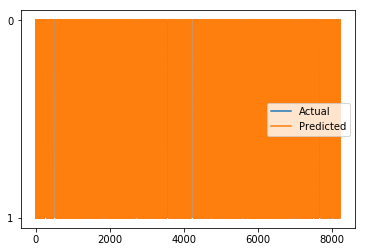

In [115]:

unq = prediction[target].unique()[::-1]
p = np.zeros((len(prediction),))
a = np.zeros((len(prediction),))
for i,q in enumerate(unq):
    p += i*(prediction[target] == q).values
    a += i*(df[target] == q).values
#Plot predictions vs actual
plt.plot(a)
plt.plot(p)
plt.legend(['Actual','Predicted'])
plt.yticks([i for i in range(len(unq))],[q for q in unq]);
print(classification_report(df[target], prediction[target]))

from sklearn.metrics import accuracy_score
print('Accuracy:',accuracy_score(df[target], prediction[target]))

In [96]:
status, model_type = ds.lookup_model_name(model)
print(model_type['description']['best_genome'])

[{'layer 1': {'type': 'LinearGene', 'parameters': {'activation': 'relu', 'numunits': 288}}}, {'layer 2': {'type': 'LinearGene', 'parameters': {'activation': 'relu', 'numunits': 2}}}]


In [97]:
ds.analyze_model(model)

(True,
 {'job_name': '5a61b7d60e9a4067b8610bcf2d322e33',
  'artifact_name': 'd918bf9168bb46f19fc20d36a2be6ce0'})

In [98]:
# analyzing the model
ds.download_artifact('153fb6e4ca054a3da7d8dbecda8b5a5f')[:10]

(True, decision_o = 1                     0.188584
 decision = 1                       0.166514
 attractive_o                       0.033629
 like                               0.028728
 attractive_partner                 0.024234
 shared_interests_o                 0.022989
 funny_o                            0.021268
 funny_partner                      0.020290
 shared_interests_partner           0.019825
 guess_prob_liked                   0.018248
 Unnamed: 0                         0.013655
 interests_correlate                0.011781
 pref_o_shared_interests            0.010881
 sincere_partner                    0.010745
 intelligence_partner               0.010582
 pref_o_attractive                  0.010390
 age_o                              0.010274
 ambitous_o                         0.009832
 sinsere_o                          0.009793
 pref_o_funny                       0.009783
 intelligence_o                     0.009314
 pref_o_sincere                     0.009290
 amb

In [100]:
# analyze the model prediction
status, artifact = ds.analyze_predictions(model,'Speed_Dating_Clean.csv')
sleep(1)
if status:
    ds.wait_for_job(artifact['job_name'])
else:
    print(artifact)
status, feature_importance = ds.download_artifact(artifact['artifact_name'])

{'status': 'Running', 'starttime': '2019-04-15T13:12:17.751155', 'endtime': None, 'percent_complete': 0, 'job_type': 'AnalyzePredictions', 'loss': 0.3134501576423645, 'generations': 2, 'dataset_names': None, 'artifact_names': ['b2a0ead9729e4e74a67a52d27a8fa201'], 'model_name': 'match_model0', 'job_error': ''}
{'status': 'Failed', 'starttime': '2019-04-15T13:12:17.751155', 'endtime': '2019-04-15T13:12:19.388051', 'percent_complete': 100, 'job_type': 'AnalyzePredictions', 'loss': 0.3134501576423645, 'generations': 2, 'dataset_names': None, 'artifact_names': ['b2a0ead9729e4e74a67a52d27a8fa201'], 'model_name': 'match_model0', 'job_error': 'TooManyRowsToExplain: Too many rows in dataset to explain. Number of rows is 8220, maximum is 500'}


In [101]:
# running a random forest model instead of Neural Nets and seeing the results differentiation
status, artifact = ds.run_model('Speed_Dating_Clean.csv', model,model_type = 'RandomForest')
sleep(1)
ds.wait_for_job(artifact['job_name'])

{'status': 'Running', 'starttime': '2019-04-15T13:13:10.930461', 'endtime': None, 'percent_complete': 0, 'job_type': 'RunModel', 'loss': 0.3134501576423645, 'generations': 2, 'dataset_names': ['Speed_Dating_Clean.csv'], 'artifact_names': ['52f7beb3d73e47e08d854d2d4cf40c5d'], 'model_name': 'match_model0', 'job_error': ''}
{'status': 'Complete', 'starttime': '2019-04-15T13:13:10.930461', 'endtime': '2019-04-15T13:13:21.396901', 'percent_complete': 100, 'job_type': 'RunModel', 'loss': 0.3134501576423645, 'generations': 2, 'dataset_names': ['Speed_Dating_Clean.csv'], 'artifact_names': ['52f7beb3d73e47e08d854d2d4cf40c5d'], 'model_name': 'match_model0', 'job_error': ''}


(True, 'Job completed')

In [102]:
status, prediction = ds.download_artifact(artifact['artifact_name'])
prediction.head()

,match,prob_0,prob_1
0,0,1.0,0.0
1,0,1.0,0.0
2,1,0.0,1.0
3,1,0.0,1.0
4,1,0.0,1.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6870
           1       1.00      1.00      1.00      1350

   micro avg       1.00      1.00      1.00      8220
   macro avg       1.00      1.00      1.00      8220
weighted avg       1.00      1.00      1.00      8220

Accuracy: 1.0


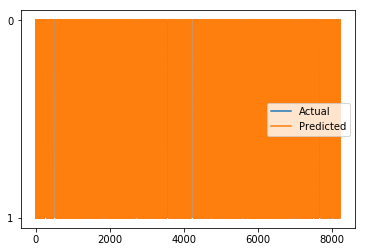

In [106]:
unq = prediction[target].unique()[::-1]
p = np.zeros((len(prediction),))
a = np.zeros((len(prediction),))
for i,q in enumerate(unq):
    p += i*(prediction[target] == q).values
    a += i*(df[target] == q).values
#Plot predictions vs actual
plt.plot(a)
plt.plot(p)
plt.legend(['Actual','Predicted'])
plt.yticks([i for i in range(len(unq))],[q for q in unq]);
print(classification_report(df[target], prediction[target]))
from sklearn.metrics import accuracy_score
print('Accuracy:',accuracy_score(df[target], prediction[target]))

{'status': 'Running', 'starttime': '2019-04-15T13:26:00.464404', 'endtime': None, 'percent_complete': 0, 'job_type': 'RunModel', 'loss': 0.3134501576423645, 'generations': 2, 'dataset_names': ['Speed_Dating_Clean.csv'], 'artifact_names': ['4a92ffe448094861b8b1cbcb68af94fb'], 'model_name': 'match_model0', 'job_error': ''}
{'status': 'Complete', 'starttime': '2019-04-15T13:26:00.464404', 'endtime': '2019-04-15T13:26:02.778496', 'percent_complete': 100, 'job_type': 'RunModel', 'loss': 0.3134501576423645, 'generations': 2, 'dataset_names': ['Speed_Dating_Clean.csv'], 'artifact_names': ['4a92ffe448094861b8b1cbcb68af94fb'], 'model_name': 'match_model0', 'job_error': ''}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6870
           1       1.00      1.00      1.00      1350

   micro avg       1.00      1.00      1.00      8220
   macro avg       1.00      1.00      1.00      8220
weighted avg       1.00      1.00      1.00      8220



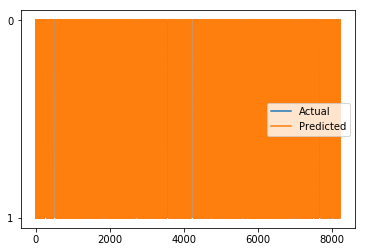

In [119]:
# running a Gradient Boosted model instead of Neural Nets and seeing the results differentiation
status, artifact = ds.run_model('Speed_Dating_Clean.csv', model,model_type = 'GradientBoosted')
sleep(1)
ds.wait_for_job(artifact['job_name'])

status, prediction = ds.download_artifact(artifact['artifact_name'])
prediction.head()

unq = prediction[target].unique()[::-1]
p = np.zeros((len(prediction),))
a = np.zeros((len(prediction),))
for i,q in enumerate(unq):
    p += i*(prediction[target] == q).values
    a += i*(df[target] == q).values
#Plot predictions vs actual
plt.plot(a)
plt.plot(p)
plt.legend(['Actual','Predicted'])
plt.yticks([i for i in range(len(unq))],[q for q in unq]);
print(classification_report(df[target], prediction[target]))
from sklearn.metrics import accuracy_score
print('Accuracy:',accuracy_score(df[target], prediction[target]))

# Using Darwin with Raw Data

In [130]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Image
from time import sleep
import os
import numpy as np
from sklearn.metrics import classification_report
from amb_sdk.sdk import DarwinSdk

In [131]:
ds = DarwinSdk()
ds.set_url('https://amb-demo-api.sparkcognition.com/v1/')
status, msg = ds.auth_login_user('aifazg92@gmail.com', 'UcLUQHr5N7')

In [132]:
data = pd.read_csv("Desktop/speeddating_raw.csv")

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (3,10,11,15,16,17,18,19,39,40,41,42,43,44,51,52,53,54,55,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,107,109) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [133]:
#Set your user id and password accordingly
USER="aifazg92@gmail.com"
PW="UcLUQHr5N7"

path = 'Desktop/'

In [134]:
dataset_name = 'speeddating_raw.csv'
df = pd.read_csv(os.path.join(path, dataset_name))
df.head()

,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,...,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
0,0,1,female,21,27,6,[4-6],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,...,[0-3],[3-5],7,6,[6-8],[5-6],0,1,0,0
1,0,1,female,21,22,1,[0-1],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,...,[0-3],[3-5],7,5,[6-8],[5-6],1,1,0,0
2,1,1,female,21,22,1,[0-1],'Asian/Pacific Islander/Asian-American','Asian/Pacific Islander/Asian-American',1,...,[0-3],[3-5],7,?,[6-8],[0-4],1,1,1,1
3,0,1,female,21,23,2,[2-3],'Asian/Pacific Islander/Asian-American',European/Caucasian-American,0,...,[0-3],[3-5],7,6,[6-8],[5-6],0,1,1,1
4,0,1,female,21,24,3,[2-3],'Asian/Pacific Islander/Asian-American','Latino/Hispanic American',0,...,[0-3],[3-5],6,6,[6-8],[5-6],0,1,1,1


In [135]:
# Upload dataset
status, dataset = ds.upload_dataset(os.path.join(path, dataset_name))
if not status:
    print(dataset)

400: BAD REQUEST - {"message": "Dataset already exists"}



In [136]:
# clean dataset
target = "match"
status, job_id = ds.clean_data(dataset_name, target = target)

if status:
    ds.wait_for_job(job_id['job_name'])
else:
    print(job_id)

{'status': 'Taken', 'starttime': '2019-04-15T14:33:51.699284', 'endtime': None, 'percent_complete': 0, 'job_type': 'CleanDataTiny', 'loss': None, 'generations': None, 'dataset_names': ['speeddating_raw.csv'], 'artifact_names': ['a6b8e73def3049cfaaeb704c06b88932'], 'model_name': None, 'job_error': None}
{'status': 'Complete', 'starttime': '2019-04-15T14:33:51.699284', 'endtime': '2019-04-15T14:34:02.835149', 'percent_complete': 100, 'job_type': 'CleanDataTiny', 'loss': None, 'generations': None, 'dataset_names': ['speeddating_raw.csv'], 'artifact_names': ['a6b8e73def3049cfaaeb704c06b88932'], 'model_name': None, 'job_error': ''}


In [137]:
model = target + "_model0"
status, job_id = ds.create_model(dataset_names = dataset_name, \
                                 model_name =  model, \
                                 max_train_time = '00:02')
if status:
    ds.wait_for_job(job_id['job_name'])
else:
    print(job_id)

400: BAD REQUEST - {"message": "A model with this name already exists"}



In [138]:
# Retrieve feature importance of built model
status, artifact = ds.analyze_model(model)
sleep(1)
if status:
    ds.wait_for_job(artifact['job_name'])
else:
    print(artifact)
status, feature_importance = ds.download_artifact(artifact['artifact_name'])

{'status': 'Running', 'starttime': '2019-04-15T14:34:11.399499', 'endtime': None, 'percent_complete': 0, 'job_type': 'AnalyzeModel', 'loss': 0.3134501576423645, 'generations': 2, 'dataset_names': None, 'artifact_names': ['6c8c0abf93b0445e81730e9b34d64945'], 'model_name': 'match_model0', 'job_error': ''}
{'status': 'Complete', 'starttime': '2019-04-15T14:34:11.399499', 'endtime': '2019-04-15T14:34:13.507289', 'percent_complete': 100, 'job_type': 'AnalyzeModel', 'loss': 0.3134501576423645, 'generations': 2, 'dataset_names': None, 'artifact_names': ['6c8c0abf93b0445e81730e9b34d64945'], 'model_name': 'match_model0', 'job_error': ''}


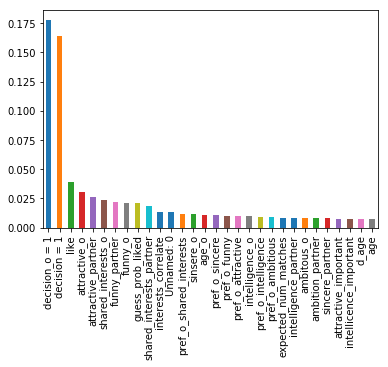

In [139]:
feature_importance[:30].plot(kind='bar')

In [140]:
status, artifact = ds.run_model(dataset_name, model,model_type = 'RandomForrest')
sleep(1)
ds.wait_for_job(artifact['job_name'])

TypeError: string indices must be integers

In [25]:
status, prediction = ds.download_artifact(artifact['artifact_name'])
prediction.head()

AttributeError: 'str' object has no attribute 'head'

In [146]:
data[]

SyntaxError: invalid syntax (<ipython-input-146-091c659cf84e>, line 1)